In [78]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [79]:
train_dataset_path = "../dataset/train/"
test_dataset_path = "../dataset/test/"

In [80]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to the range [0, 1]
)

train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=(224, 224),  # Set the target image size
    batch_size=32,  # Set the batch size
    class_mode="categorical",  # Choose 'binary' for binary classification
    shuffle=True,  # Shuffle the data during training
)

test_generator = datagen.flow_from_directory(
    test_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,  # Do not shuffle the data during testing
)

Found 12000 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


In [81]:
class_names = ["Black Rot", "ESCA", "Healthy", "Leaf Blight"]

In [82]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(len(class_names), activation="softmax"))  # Output layer

In [83]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
epochs = 10  # Adjust the number of epochs as needed

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/10
375/375 [==============================] - 714s 2s/step - loss: 0.4446 - accuracy: 0.8313 - val_loss: 0.1764 - val_accuracy: 0.9397
Epoch 2/10
375/375 [==============================] - 668s 2s/step - loss: 0.1802 - accuracy: 0.9362 - val_loss: 0.1301 - val_accuracy: 0.9548
Epoch 3/10
375/375 [==============================] - 480s 1s/step - loss: 0.0932 - accuracy: 0.9697 - val_loss: 0.1372 - val_accuracy: 0.9526
Epoch 4/10
375/375 [==============================] - 572s 2s/step - loss: 0.0616 - accuracy: 0.9787 - val_loss: 0.0448 - val_accuracy: 0.9833
Epoch 5/10
375/375 [==============================] - 395s 1s/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0894 - val_accuracy: 0.9704
Epoch 6/10
375/375 [==============================] - 400s 1s/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0642 - val_accuracy: 0.9799
Epoch 7/10
375/375 [==============================] - 597s 2s/step - loss: 0.0328 - accuracy: 0.9882 - val_loss: 0.0873 - val_accuracy: 0.9727

In [85]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_accuracy)

56/56 [==============================] - 23s 401ms/step - loss: 0.0849 - accuracy: 0.9782
Test accuracy: 0.9782366156578064


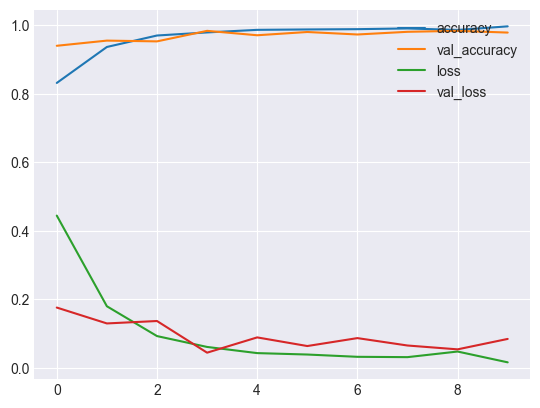

In [86]:
# Plot training history (accuracy and loss)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(loc="upper right")
plt.show()

In [88]:
from pathlib import Path

model_structure = model.to_json()
file = Path("model_structure.json")
file.write_text(model_structure)
model.save_weights("model_weights.h5")